In [1]:
# %load ../../setup.py
"""
Packages for plotting and other stuff
version: 1.0
author: Riasat
"""
# %matplotlib widget

# data loading
import pandas as pd

# data maipulation
import pwlf
import numpy as np
from scipy.interpolate import interp1d

# plotting tools
import matplotlib.pyplot as plt

# extra tweaks
import warnings

warnings.filterwarnings("ignore")

# plot tweaks
plt.style.use("seaborn-poster")
pd.options.display.max_columns = None
pd.options.display.float_format = "{:.2f}".format

# function for interpolation
def interpolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate2d(x, y):
    f = interp1d(x, y, kind="quadratic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate3d(x, y):
    f = interp1d(x, y, kind="cubic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# funciton for polynomial fitting
def polfit(a, b, c):
    z = np.polyfit(a, b, c)
    f = np.poly1d(z)

    x = np.arange(a[0], a[len(a) - 1], 0.001)
    y = f(x)
    return x, y


# function for picewise linear fit
def picewise_linear_fit(x, y, segments):
    my_pwlf = pwlf.PiecewiseLinFit(x, y)  # fit my data
    res = my_pwlf.fit(segments)  # fit the data for n line segments
    # slopes = myPWLF.calc_slopes()  # calculate slopes

    # predict for the determined points
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)

    # calculate statistics
    # p = myPWLF.p_values(method="non-linear", step_size=1e-4)  # p-values
    # se = myPWLF.se  # standard errors
    return xHat, yHat


# Datas


In [2]:

# plateau datas
data_plateau = pd.read_excel("endpoint_datas.xlsx", sheet_name="plateau")
pl_voltage = data_plateau["p_voltage"]
pl_counts = data_plateau["p_counts"]

# thickness data
data_thickness_tl = pd.read_excel("endpoint_datas.xlsx", sheet_name="tl")
data_thickness_sryt = pd.read_excel("endpoint_datas.xlsx", sheet_name="sryt")
# tellurium datas
tl_thickness_original = data_thickness_tl["t_thickness_tl"]
tl_counts_original = data_thickness_tl["t_counts_tl"]
# strontium-ytterium datas
sryt_thickness_original = data_thickness_sryt["s_thickness_sryt"]
sryt_counts_original = data_thickness_sryt["s_counts_sryt"]

# distances data
data_distance = pd.read_excel("endpoint_datas.xlsx", sheet_name="distance")
# tellurium
distance_tl = data_distance["d_distance"]
counts_tl = data_distance["d_counts_tl"]
# strontium-ytterium
distance_sryt = data_distance["d_distance"]
counts_sryt = data_distance["d_counts_sryt"]


# Plateau


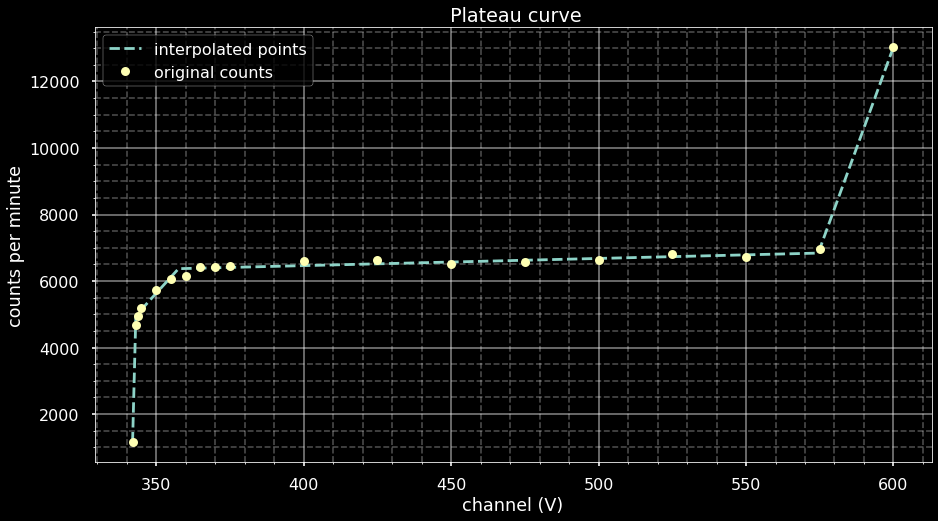

In [3]:

voltage_interpolated_pl, counts_interpolated_pl = picewise_linear_fit(pl_voltage, pl_counts,4)

plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f" Plateau curve")
plt.xlabel("channel (V)")
plt.ylabel("counts per minute")
plt.plot(voltage_interpolated_pl, counts_interpolated_pl, "--", label="interpolated points")
plt.plot(pl_voltage, pl_counts, "o", markersize=9, label="original counts")
plt.legend(loc="upper left")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")
plt.show()


I choosed the operating voltage at 400 V


# Thickness Curve

Varying the absorber in the GM counter tube.


In [4]:
thickness_fitted_tl, counts_fitted_tl = polfit(tl_thickness_original, tl_counts_original, 3)
thickness_fitted_sryt, counts_fitted_sryt = polfit(sryt_thickness_original, sryt_counts_original, 3)

element_name = ["Tellurium-204", "Strontium-90 Yttrium-90"]
thickness_fitted = [thickness_fitted_tl, thickness_fitted_sryt]
counts_fitted = [counts_fitted_tl, counts_fitted_sryt]
thickness_original = [tl_thickness_original, sryt_thickness_original]
counts_original = [tl_counts_original, sryt_counts_original]

# finding the half width
thickness_half = []
c_half = []
for i in range(len(element_name)):
    count_half = counts_fitted[i][0] / 2
    c_half.append(count_half)
    th = interp1d(counts_fitted[i], thickness_fitted[i], kind="cubic")
    thickness_half.append(th(count_half))
    print(
        f"{element_name[i]}: \n\t max count = {counts_fitted[i][0]:.0f}, half count = {count_half:.0f} \n\t half thickness = {thickness_half[i]:.2f} cm"
    )


Tellurium-204: 
	 max count = 6386, half count = 3193 
	 half thickness = 28.25 cm
Strontium-90 Yttrium-90: 
	 max count = 1523, half count = 761 
	 half thickness = 97.05 cm


## Tellurium


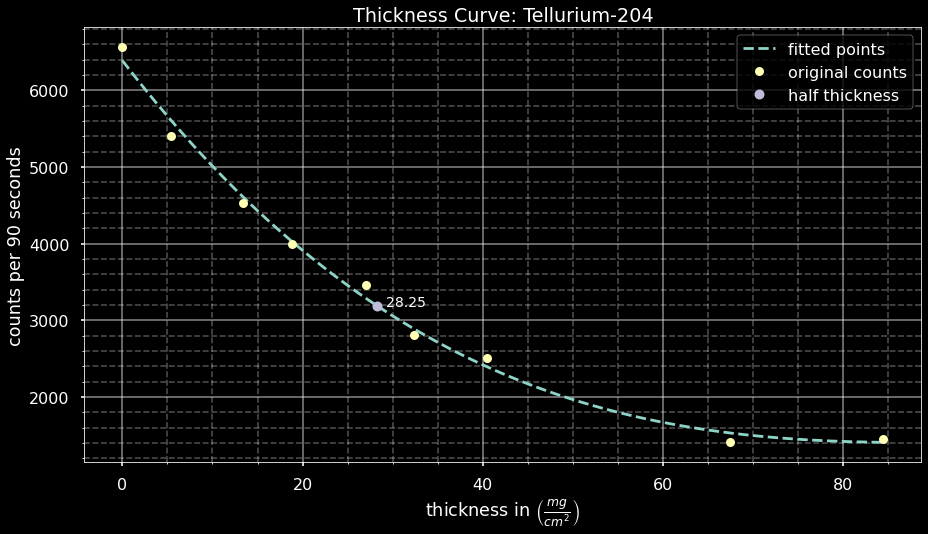

In [5]:
# plotting the curves
plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))

plt.title(f"Thickness Curve: {element_name[0]}")
plt.xlabel(r"thickness in $\left(\frac{mg}{cm^2}\right)$")
plt.ylabel("counts per 90 seconds")

plt.plot(thickness_fitted[0], counts_fitted[0], "--", label="fitted points")
plt.annotate(f"{thickness_half[0]:.2f}", xy=(thickness_half[0] + 1, c_half[0]), fontsize=14)
plt.plot(thickness_original[0], counts_original[0], "o", markersize=9, label="original counts")
plt.plot(thickness_half[0], c_half[0], "o", markersize=10, label="half thickness")

plt.legend(loc="upper right")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")

plt.show()



## Strontium-Yetrrium


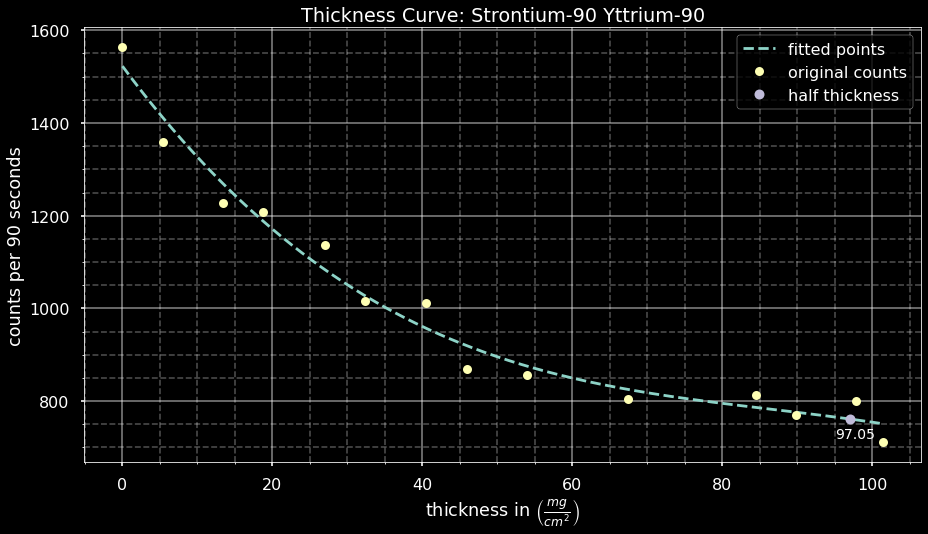

In [6]:
plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))


plt.title(f"Thickness Curve: {element_name[1]}")
plt.xlabel(r"thickness in $\left(\frac{mg}{cm^2}\right)$")
plt.ylabel("counts per 90 seconds")

plt.plot(thickness_fitted[1], counts_fitted[1], "--", label="fitted points")
plt.annotate(f"{thickness_half[1]:.2f}", xy=(thickness_half[1] - 2, c_half[1] - 40), fontsize=14)
plt.plot(thickness_original[1], counts_original[1], "o", markersize=9, label="original counts")
plt.plot(thickness_half[1], c_half[1], "o", markersize=10, label="half thickness")

plt.legend(loc="upper right")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")

plt.show()


## Calculation using the half thickness


In [7]:
#  units used is mg/cm^2
t1 = thickness_half[0]
t2 = thickness_half[1]
r1 = 291.083

# using the relation t1/t2 = r1/r2
r2 = r1 * (t2 / t1)
print(f"the range of Sr-Yt  = {r2:.3f} mg/cm^2")

# n = 1.265 - 0.0954* np.log(e2)
# r2 = 412 * e2**n

# coeff = [-0.0954, 1.265, -(np.log(r2 / 412))]
coeff = [-0.0954, 1.265, -0.88686]
solution = np.roots(coeff)
print(solution)
for i in range(len(solution)):
    if solution[i] <= 1:
        energy = np.exp(1) ** solution[i]
        print(f"the energy of Sr-Yt = {energy:.3f} MeV")



the range of Sr-Yt  = 1000.111 mg/cm^2
[12.51728705  0.74267103]
the energy of Sr-Yt = 2.102 MeV


# Distance

varying the distance of the source from the GM counter. Done outside the tube in a moveable scale and holder


0   0.08
1   0.07
2   0.11
3   0.12
4   0.16
5   0.19
6   0.17
7   0.19
8   0.22
9   0.23
dtype: float64, 0     2
1     3
2     4
3     5
4     6
5     7
6     8
7     9
8    10
9    11
Name: d_distance, dtype: int64
the intercept = 0.038


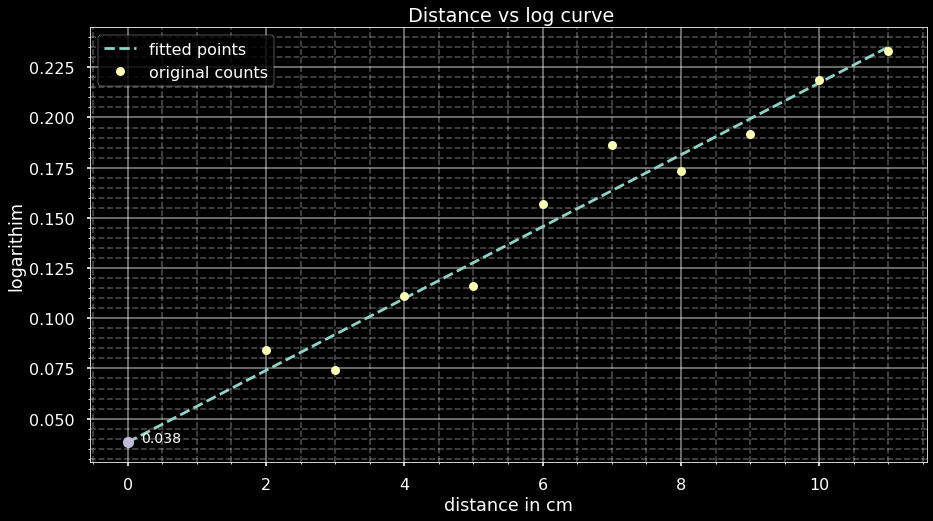

In [8]:
# function for interpolation
def inter0(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(0, x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


n_01 = 22968
n_02 = 4061

# logf = np.log10((counts_tl / counts_sryt) * 0.1768)
logf = np.log10((counts_sryt / counts_tl) * (n_01/ n_02))
dist = data_distance["d_distance"]
print(f"{logf}, {dist}")
dist_fit, logf_fit = polfit(dist, logf, 1)

d, l = inter0(dist_fit, logf_fit)

# c = np.interp(0, dist_fit, logf_fit)
c = np.interp(0, d, l)
print(f"the intercept = {c:.3f}")


plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f" Distance vs log curve")
plt.xlabel("distance in cm")
plt.ylabel("logarithim")
# plt.plot(dist_fit, logf_fit, "--", label="fitted points")
plt.plot(d, l, "--", label="fitted points")
plt.plot(dist, logf, "o", markersize=9, label="original counts")
plt.plot(0, c, "o")
plt.annotate(f"{c:.3f}", xy=(0.2, c), fontsize=14)

plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")

plt.legend(loc="upper left")
plt.show()


## final calculation


In [9]:
mu_1 = 17 * (0.764 ** -1.43)
mu_2 = 17 * (2.102 ** -1.43)

del_mu = mu_1 - mu_2

print(mu_1, mu_2, del_mu)
w = c / del_mu
print(f"the thickness = {w:.5f} mg/cm^2")


24.981897297930786 5.87603188405153 19.105865413879258
the thickness = 0.00200 mg/cm^2
